# Naive Bayes Algorithms
Naive Bayes models is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

As the name suggested Naive Bayes is based on Bayes Theorem. It assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive.

So here it is important to know what is Bayes theorem. Bayes' Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes' Theorem is stated as:

P(class|data) = (P(data|class) * P(class))/P(data)

Where P(class|data) is the probability of class given the provided data.

### Here we will be using data which is spam or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
# Reading the data:
df = pd.read_csv("SMSSpamCollection.csv")
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ham_spam = df.value_counts(df.Class)

In [4]:
# Checking percentage of spam count:
total_messages = ham_spam[0] + ham_spam[1]
spam_percentage = (ham_spam[1] / total_messages) * 100

print("Spam Percentage is:",spam_percentage)

Spam Percentage is: 13.406317300789663


In [5]:
# mapping a column labels to ham as 0 and spam as 1 respectively:
df["label"] = df.Class.map({"ham":0,"spam":1})
df.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
# Dropping the "Class" feature:
df = df.drop("Class",axis=1)

In [7]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
# Splitting the data into target and features:
x = df.sms
y = df.label

print(x.shape)
print(y.shape)

(5572,)
(5572,)


In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

# Naive Bayes in scikit-learn

scikit-learn implements three Naive Bayes variants based on the same number of different probablistic distribution:

1. Bernoulli: This is a binary distribution useful when a feature can be present or absent.

2. multinomial This is a discrete distribution used whenever a feature must be represented by a whole number (for example, in natural language processing, it can be the frequency of a term)

3. Gaussian This is a continuous distribution characterized by its mean and variance.

In [10]:
xtrain.head()

4393                       what are your new years plans?
216     Finally the match heading towards draw as your...
4471    Lemme know when I can swing by and pick up, I'...
3889                   ok....take care.umma to you too...
5030    I'd like to tell you my deepest darkest fantas...
Name: sms, dtype: object

In [11]:
# import CountVectorizer:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating CountVectorizer with stop_words
vect = CountVectorizer(stop_words="english")

# fitting vector on the feature:
vect.fit(xtrain)

CountVectorizer(stop_words='english')

In [12]:
# checking count of words in the features:
vect.vocabulary_

{'new': 4272,
 'years': 6855,
 'plans': 4682,
 'finally': 2550,
 'match': 3930,
 'heading': 3018,
 'draw': 2202,
 'prediction': 4801,
 'lemme': 3650,
 'know': 3548,
 'swing': 5957,
 'pick': 4644,
 'free': 2663,
 'basically': 1119,
 'time': 6163,
 'semester': 5369,
 'ok': 4406,
 'care': 1485,
 'umma': 6353,
 'like': 3685,
 'tell': 6043,
 'deepest': 2000,
 'darkest': 1949,
 'fantasies': 2478,
 '09094646631': 222,
 'just': 3472,
 '60p': 538,
 'min': 4022,
 'stop': 5804,
 'texts': 6083,
 '08712460324': 103,
 'nat': 4218,
 'rate': 4985,
 'lmao': 3732,
 'fish': 2566,
 'memory': 3984,
 'need': 4243,
 'yahoo': 6841,
 'boys': 1324,
 'bring': 1354,
 'perf': 4592,
 'legal': 3644,
 'hiya': 3083,
 'comin': 1722,
 'bristol': 1358,
 'st': 5740,
 'week': 6637,
 'april': 940,
 'les': 3656,
 'got': 2862,
 'rudi': 5234,
 'yrs': 6882,
 'eve': 2383,
 'snoring': 5603,
 'drunk': 2226,
 'bak': 1092,
 'college': 1710,
 'work': 6769,
 'sends': 5374,
 'ink': 3289,
 'bath': 1123,
 'wamma': 6574,
 'laid': 3581,
 '

In [13]:
# Checing how features names seperately in the form of words:
vect.get_feature_names()

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0789xxxxxxx',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08701213186',
 '08701417012',
 '08701417012150p',


In [14]:
# transformation of the training features
xtrain_transformed = vect.transform(xtrain)
xtest_transformed = vect.transform(xtest)

In [15]:
print(xtrain_transformed.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
# printing leangth of feature names:
print(len(vect.get_feature_names()))

6904


In [17]:
# printing shape of xtrain_transformed
xtrain_transformed.shape

(3900, 6904)

In [18]:
# printing xtrain_transformed
print(xtrain_transformed)

  (0, 4272)	1
  (0, 4682)	1
  (0, 6855)	1
  (1, 2202)	1
  (1, 2550)	1
  (1, 3018)	1
  (1, 3930)	1
  (1, 4801)	1
  (2, 1119)	1
  (2, 2663)	1
  (2, 3548)	1
  (2, 3650)	1
  (2, 4644)	1
  (2, 5369)	1
  (2, 5957)	1
  (2, 6163)	1
  (3, 1485)	1
  (3, 4406)	1
  (3, 6353)	1
  (4, 103)	1
  (4, 222)	1
  (4, 538)	1
  (4, 1949)	1
  (4, 2000)	1
  (4, 2478)	1
  :	:
  (3897, 3721)	1
  (3897, 4248)	1
  (3897, 5026)	1
  (3897, 5949)	1
  (3897, 6839)	1
  (3898, 243)	1
  (3898, 295)	1
  (3898, 344)	1
  (3898, 799)	1
  (3898, 1959)	1
  (3898, 2590)	1
  (3898, 3435)	1
  (3898, 3472)	1
  (3898, 3966)	1
  (3898, 4148)	1
  (3898, 4584)	1
  (3898, 5031)	1
  (3898, 5115)	1
  (3898, 5273)	1
  (3898, 5399)	1
  (3898, 6074)	1
  (3898, 6122)	1
  (3898, 6196)	1
  (3899, 1574)	1
  (3899, 5590)	1


In [19]:
# Converting xtrain_transformed matrix to dataframe:
pd.DataFrame(xtrain_transformed.toarray(),columns=vect.get_feature_names())

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zebra,zed,zeros,zhong,zindgi,zoe,zoom,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Applying Naive Bayes Algorithm:

# 1. Bernoulli Naive Bayes Algorithm

In [20]:
# import BernoulliNB
from sklearn.naive_bayes import BernoulliNB

# instantiate BernoulliNB object
bnb = BernoulliNB()

# fit model on training dataset
bnb.fit(xtrain_transformed,ytrain)

# predicting class of y
ypred_class = bnb.predict(xtest_transformed)

# predicting probability of y
ypred_probab = bnb.predict(xtest_transformed)

# Evaluation of the model:
cm=confusion_matrix(ytest,ypred_class)
cr=classification_report(ytest,ypred_class)
ac=accuracy_score(ytest,ypred_class)
print(f'{cm}\n {cr}\n Accuracy{ac}')

[[1441    1]
 [  44  186]]
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1442
           1       0.99      0.81      0.89       230

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672

 Accuracy0.9730861244019139


# Creating ROC curve for Bernoulli Naive Bayes Algorithm:
AUC ROC curve is a performance measurement for the classification problems at various threshold settings. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

In [21]:
# Importing roc_curve and auc
from sklearn.metrics import roc_curve, auc

# Calculating false_positive_rate, true_positive_rate, and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, ypred_probab)

# Calculating area under the curve (AUC):
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9040010854489537


In [22]:
false_positive_rate, true_positive_rate, thresholds

(array([0.00000000e+00, 6.93481276e-04, 1.00000000e+00]),
 array([0.        , 0.80869565, 1.        ]),
 array([2, 1, 0], dtype=int64))

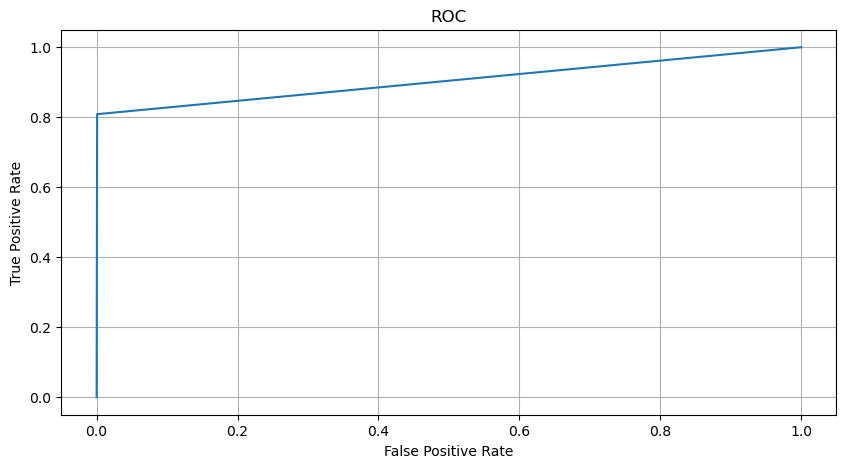

In [23]:
# Plotting the ROC curve (FPR vs. TPR):
plt.figure(figsize=(10,5))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)
plt.grid()
plt.show()

# 2. Multinomial Naive Bayes Algorithm

In [24]:
# import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# instantiate BernoulliNB object
mnb = MultinomialNB()

# fit model on training dataset
mnb.fit(xtrain_transformed,ytrain)

# predicting class of y
ypred_class = mnb.predict(xtest_transformed)

# predicting probability of y
ypred_probab = mnb.predict(xtest_transformed)

# Evaluation of the model:
cm=confusion_matrix(ytest,ypred_class)
cr=classification_report(ytest,ypred_class)
ac=accuracy_score(ytest,ypred_class)
print(f'{cm}\n {cr}\n Accuracy{ac}')

[[1434    8]
 [  15  215]]
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1442
           1       0.96      0.93      0.95       230

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

 Accuracy0.986244019138756


# Creating ROC curve for Multinomial Naive Bayes Algorithm:

In [25]:
# Importing roc_curve and auc
from sklearn.metrics import roc_curve, auc

# Calculating false_positive_rate, true_positive_rate, and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, ypred_probab)

# Calculating area under the curve (AUC):
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.964617379243804


In [26]:
false_positive_rate, true_positive_rate, thresholds

(array([0.        , 0.00554785, 1.        ]),
 array([0.        , 0.93478261, 1.        ]),
 array([2, 1, 0], dtype=int64))

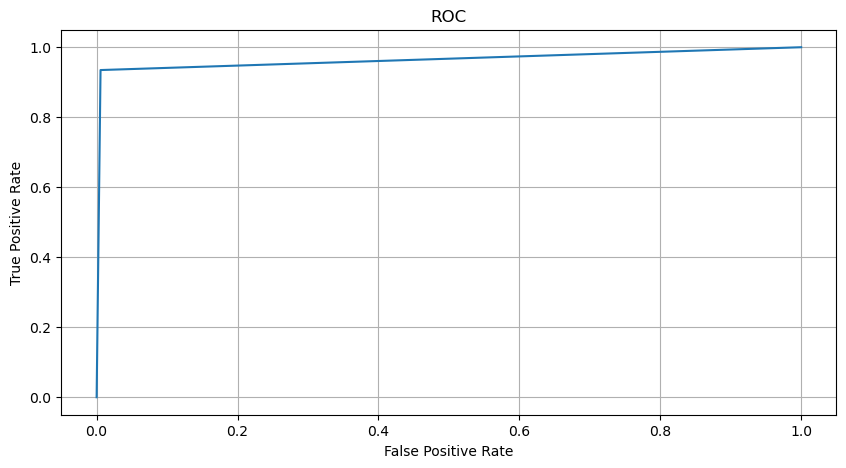

In [27]:
# Plotting the ROC curve (FPR vs. TPR):
plt.figure(figsize=(10,5))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)
plt.grid()
plt.show()

# 3. Gaussian Naive Bayes Algorithm

In [28]:
# Import GaussianNB
from sklearn.naive_bayes import GaussianNB

# Instantiate GaussianNB object
gnb = GaussianNB()

# Convert sparse matrices to dense numpy arrays
xtrain_dense = xtrain_transformed.toarray()
xtest_dense = xtest_transformed.toarray()

# Fit the model on the training dataset
gnb.fit(xtrain_dense, ytrain)

# Predict class labels of y
ypred_class = gnb.predict(xtest_dense)

# Predict probabilities of y
ypred_probab = gnb.predict_proba(xtest_dense)[:, 1]  # Use predict_proba for probability of positive class (1)

# Evaluation of the model:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(ytest, ypred_class)
cr = classification_report(ytest, ypred_class)
ac = accuracy_score(ytest, ypred_class)
print(f'{cm}\n{cr}\nAccuracy: {ac}')

[[1277  165]
 [  18  212]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.93      1442
           1       0.56      0.92      0.70       230

    accuracy                           0.89      1672
   macro avg       0.77      0.90      0.82      1672
weighted avg       0.93      0.89      0.90      1672

Accuracy: 0.8905502392344498


# Creating ROC curve for Gaussian Naive Bayes Algorithm:

In [29]:
# Importing roc_curve and auc
from sklearn.metrics import roc_curve, auc

# Calculating false_positive_rate, true_positive_rate, and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, ypred_probab)

# Calculating area under the curve (AUC):
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9036573599469336


In [30]:
false_positive_rate, true_positive_rate, thresholds

(array([0.        , 0.11442441, 1.        ]),
 array([0.        , 0.92173913, 1.        ]),
 array([2., 1., 0.]))

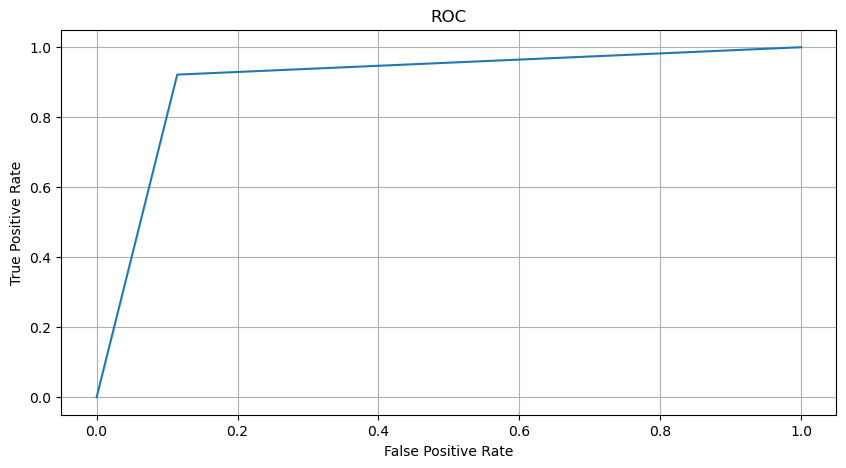

In [31]:
# Plotting the ROC curve (FPR vs. TPR):
plt.figure(figsize=(10,5))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)
plt.grid()
plt.show()